In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/7k-books-with-metadata


In [11]:
import pandas as pd

In [12]:
books = pd.read_csv(f"{path}/books.csv")

In [13]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

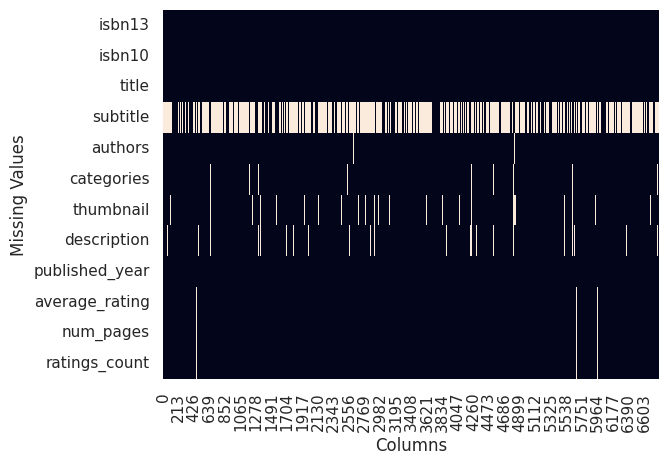

In [15]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

In [16]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

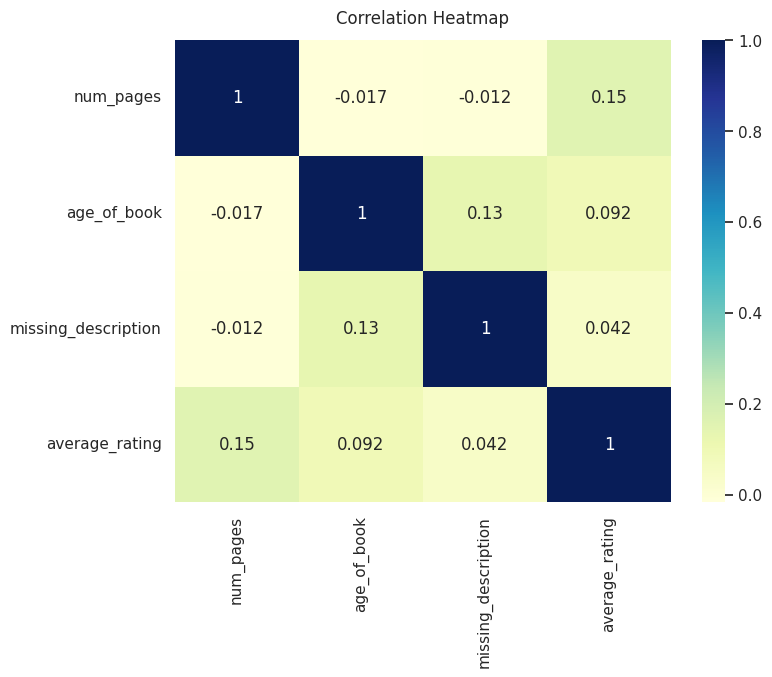

In [17]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [31]:
books.columns = books.columns.str.strip()

In [32]:
book_missing = books[(books["description"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["published_year"].isna())]


In [21]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,9783425040844,3425040847,In the Country of Last Things,Hauptbd.,Paul Auster,NaN,http://books.google.com/books/content?id=hdWax...,NaN,2001.0,3.91,188.0,6230.0,1,24.0
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [33]:
category_counts = book_missing["categories"].value_counts().reset_index()
category_counts.columns = ["category", "count"]

In [34]:
category_counts = category_counts.sort_values("count", ascending=False)

In [24]:
book_missing

,categories,count
0,Fiction,51
1,Biography & Autobiography,8
2,Comics & Graphic Novels,7
3,Philosophy,6
4,History,5
...,...,...
92,Short stories,1
93,Construction workers,1
94,American literature,1
95,Mysticism,1


In [30]:
print(books.columns)


Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_description', 'age_of_book'],
      dtype='object')


In [36]:
book_missing.loc[:, "words_in_description"] = book_missing["description"].str.split().str.len()


In [38]:
book_missing["missing_description"] = book_missing["description"].isna().astype(int)


/tmp/ipython-input-38-3869868647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["missing_description"] = book_missing["description"].isna().astype(int)


In [39]:
print(book_missing["missing_description"].value_counts())


missing_description
1    255
Name: count, dtype: int64


In [40]:
print(book_missing[book_missing["description"].isna()][["title", "description", "missing_description"]])


                                                  title description  \
37                    The Princess of the Chalet School         NaN   
60                                  The illustrated man         NaN   
99    The Chronicles of Narnia: Lion, the witch and ...         NaN   
102                                   Reason in History         NaN   
105                                             Spandau         NaN   
...                                                 ...         ...   
6786                      In the Country of Last Things         NaN   
6787                                        About a Boy         NaN   
6788             Enzyme-Catalyzed Synthesis of Polymers         NaN   
6806                               Secrets Of The Heart         NaN   
6807                                     Fahrenheit 451         NaN   

      missing_description  
37                      1  
60                      1  
99                      1  
102                     1  
105    

In [41]:
book_missing


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0,NaN
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0,NaN
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0,NaN
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0,NaN
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,9783425040844,3425040847,In the Country of Last Things,Hauptbd.,Paul Auster,NaN,http://books.google.com/books/content?id=hdWax...,NaN,2001.0,3.91,188.0,6230.0,1,24.0,NaN
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0,NaN
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0,NaN
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0,NaN


In [45]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]


,description


In [51]:
# Step 1: Filter books where description exists (not missing)
books_with_description = books[books["description"].notna()].copy()

# Step 2: Count number of words in description
books_with_description["words_in_description"] = books_with_description["description"].str.split().str.len()

# Step 3: Filter rows with 5–14 words
filtered_desc = books_with_description.loc[
    books_with_description["words_in_description"].between(15, 24),
    ["title", "description", "words_in_description"]
]

# Step 4: Show results
print(filtered_desc.head(10))




                           title  \
10             If Tomorrow Comes   
32     The Bonesetter's Daughter   
36      A Small Pinch of Weather   
57        The Secret of Chimneys   
68        Breaking Open the Head   
82   I Wish that I Had Duck Feet   
83           Oh Say Can You Say?   
90               The Known World   
95   The Love of the Last Tycoon   
106         The Rumble Seat Pony   

                                           description  words_in_description  
10   One of Sidney Sheldon's most popular and bests...                    18  
32   Tells the story of three generations of Chines...                    16  
36   A magical and fantastic collection of early st...                    24  
57   A young drifter finds more than he bargained f...                    21  
68   A new 'The Doors of Perception' for the 21st c...                    23  
82   A boy imagines what it would be like if he had...                    23  
83   Tie your tongue in terrible knots as you try 

In [55]:
book_with_25_words = books_with_description[books_with_description["words_in_description"] >= 25]
book_with_25_words.head()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75


In [59]:
book_with_25_words["title_and_subtitles"] = np.where(
    book_with_25_words["subtitle"].isna(),
    book_with_25_words["title"],
    book_with_25_words[["title", "subtitle"]].astype(str).agg(" : ".join, axis=1)
)


/tmp/ipython-input-59-722069698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_with_25_words["title_and_subtitles"] = np.where(


In [60]:
book_with_25_words[["title_and_subtitles", "words_in_description"]].head()


,title_and_subtitles,words_in_description
0,Gilead,199
1,Spider's Web : A Novel,205
3,Rage of angels,57
4,The Four Loves,45
5,The Problem of Pain,75


In [61]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("book_cleaned.csv", index=False)
)